<a href="https://colab.research.google.com/github/mayankjamindaruk/Machine_Learning_Bootcamp/blob/master/USA_Cancer_Prediction_Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# the below code is for displaying the output from all lines of python code within a single cell
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

# A fundamental package for linear algebra and multidimensional arrays
import pandas as pd                  

# Data analysis and data manipulating tool
import numpy as np                   

# Library to generate random numbers
import random                        

# Collection is a Python module that implements specialized container datatypes providing 
# Counter is a dict subclass for counting hashable objects
from collections import Counter      
                                     
# Visualization libraries
import matplotlib.pyplot as plt
import seaborn as sns

# To ignore warnings in the notebook
import warnings
warnings.filterwarnings("ignore")

# to display up to 500 rows in the output of the jupyter notebook cell
pd.set_option('display.max_rows', 500)

In [2]:
# import training data as pandas dataframe
# the data is in csv - comma separated file. Hence we use the function 'read_csv'

cancer_data  = pd.read_csv("https://raw.githubusercontent.com/dphi-official/Datasets/master/cancer_death_rate/Training_set_label.csv" )

# the below code will print the number of rows and columns
cancer_data.shape

(3051, 34)

In [45]:
test_data = pd.read_csv('https://raw.githubusercontent.com/dphi-official/Datasets/master/cancer_death_rate/Testing_set_label.csv')

test_data.shape

(762, 33)

In [4]:
cancer_data.dtypes

avgAnnCount                float64
avgDeathsPerYear             int64
incidenceRate              float64
medIncome                    int64
popEst2015                   int64
povertyPercent             float64
studyPerCap                float64
binnedInc                   object
MedianAge                  float64
MedianAgeMale              float64
MedianAgeFemale            float64
Geography                   object
AvgHouseholdSize           float64
PercentMarried             float64
PctNoHS18_24               float64
PctHS18_24                 float64
PctSomeCol18_24            float64
PctBachDeg18_24            float64
PctHS25_Over               float64
PctBachDeg25_Over          float64
PctEmployed16_Over         float64
PctUnemployed16_Over       float64
PctPrivateCoverage         float64
PctPrivateCoverageAlone    float64
PctEmpPrivCoverage         float64
PctPublicCoverage          float64
PctPublicCoverageAlone     float64
PctWhite                   float64
PctBlack            

In [5]:
test_data.dtypes

avgAnnCount                float64
avgDeathsPerYear             int64
incidenceRate              float64
medIncome                    int64
popEst2015                   int64
povertyPercent             float64
studyPerCap                float64
binnedInc                   object
MedianAge                  float64
MedianAgeMale              float64
MedianAgeFemale            float64
Geography                   object
AvgHouseholdSize           float64
PercentMarried             float64
PctNoHS18_24               float64
PctHS18_24                 float64
PctSomeCol18_24            float64
PctBachDeg18_24            float64
PctHS25_Over               float64
PctBachDeg25_Over          float64
PctEmployed16_Over         float64
PctUnemployed16_Over       float64
PctPrivateCoverage         float64
PctPrivateCoverageAlone    float64
PctEmpPrivCoverage         float64
PctPublicCoverage          float64
PctPublicCoverageAlone     float64
PctWhite                   float64
PctBlack            

In [6]:
cancer_data.head(10)

,avgAnnCount,avgDeathsPerYear,incidenceRate,medIncome,popEst2015,povertyPercent,studyPerCap,binnedInc,MedianAge,MedianAgeMale,MedianAgeFemale,Geography,AvgHouseholdSize,PercentMarried,PctNoHS18_24,PctHS18_24,PctSomeCol18_24,PctBachDeg18_24,PctHS25_Over,PctBachDeg25_Over,PctEmployed16_Over,PctUnemployed16_Over,PctPrivateCoverage,PctPrivateCoverageAlone,PctEmpPrivCoverage,PctPublicCoverage,PctPublicCoverageAlone,PctWhite,PctBlack,PctAsian,PctOtherRace,PctMarriedHouseholds,BirthRate,TARGET_deathRate
0,19.0,8,481.5,50038,2704,11.1,0.000000,"(48021.6, 51046.4]",48.4,49.6,46.4,"Hettinger County, North Dakota",2.250,65.9,10.8,25.0,57.4,6.8,37.1,12.2,57.4,1.1,81.2,56.0,35.7,34.7,9.9,96.032049,0.724914,0.000000,0.000000,62.511457,15.157116,160.3
1,88.0,34,486.0,59399,14844,9.7,0.000000,"(54545.6, 61494.5]",41.9,41.3,43.2,"Mills County, Iowa",2.630,58.6,22.3,29.1,NaN,1.1,35.9,16.0,60.4,3.8,76.7,NaN,50.8,32.1,12.8,97.537344,0.719957,0.080743,0.040371,61.641045,3.293510,194.9
2,195.0,83,475.7,39721,25164,18.5,0.000000,"(37413.8, 40362.7]",48.9,47.9,49.9,"Gladwin County, Michigan",2.300,57.2,24.9,36.2,NaN,3.5,40.2,7.6,41.2,11.0,61.6,NaN,32.1,49.8,21.6,97.576566,0.360770,0.411749,0.082350,53.978102,6.390328,196.5
3,116.0,55,496.6,30299,17917,28.1,0.000000,"[22640, 34218.1]",44.2,42.7,45.2,"Fentress County, Tennessee",2.430,53.0,10.9,51.8,NaN,5.3,44.2,7.0,41.6,10.4,45.2,NaN,24.2,53.2,33.0,97.908650,0.161731,0.306731,0.340193,51.013143,5.124836,230.9
4,80.0,35,372.0,39625,14058,17.4,0.000000,"(37413.8, 40362.7]",45.0,42.2,48.0,"Las Animas County, Colorado",2.360,52.2,12.6,31.2,NaN,0.2,28.3,10.5,49.3,9.2,56.6,NaN,33.4,43.0,24.7,82.672551,1.834103,0.682617,8.253465,50.566426,3.897033,162.2
5,49.0,24,437.7,27596,9122,32.5,0.000000,"[22640, 34218.1]",36.8,35.6,42.9,"Wilkinson County, Mississippi",2.600,34.4,28.5,40.8,NaN,7.3,36.1,10.0,39.0,9.7,42.3,32.7,27.9,48.2,32.0,28.871054,70.658106,0.000000,0.470840,36.054846,2.790179,219.7
6,44.0,14,506.7,55758,6309,11.3,0.000000,"(54545.6, 61494.5]",43.2,42.5,43.7,"Clay County, Nebraska",0.024,61.2,25.2,28.1,40.6,6.1,32.6,14.2,63.1,2.8,69.5,NaN,37.3,32.5,15.8,96.772172,0.454403,0.376058,0.893137,57.241116,8.012821,148.9
7,419.0,189,426.3,39922,82005,17.2,512.163892,"(37413.8, 40362.7]",40.5,39.4,41.9,"Cullman County, Alabama",2.550,57.6,20.6,30.6,44.7,4.1,34.7,9.1,49.7,7.3,62.6,47.9,42.1,35.3,19.0,95.693201,1.190638,0.557031,0.737356,54.850257,3.913309,187.9
8,929.0,355,507.3,42728,152692,18.0,438.791816,"(42724.4, 45201]",41.3,39.9,42.8,"Penobscot County, Maine",2.360,48.0,10.2,21.9,58.4,9.5,34.9,15.6,56.1,7.8,63.3,NaN,42.4,39.4,20.7,95.200636,0.825746,1.099474,0.158371,48.025753,4.133114,187.5
9,1081.0,367,490.9,53733,212284,15.7,249.665542,"(51046.4, 54545.6]",36.5,35.6,37.5,"Whatcom County, Washington",2.530,47.5,9.4,22.1,NaN,7.7,23.0,21.3,57.8,8.2,68.7,54.6,44.8,31.9,17.4,85.470304,0.880734,3.925157,2.425881,48.068750,4.472986,163.3


In [7]:
cancer_data.isnull().sum()

avgAnnCount                   0
avgDeathsPerYear              0
incidenceRate                 0
medIncome                     0
popEst2015                    0
povertyPercent                0
studyPerCap                   0
binnedInc                     0
MedianAge                     0
MedianAgeMale                 0
MedianAgeFemale               0
Geography                     0
AvgHouseholdSize              0
PercentMarried                0
PctNoHS18_24                  0
PctHS18_24                    0
PctSomeCol18_24            2266
PctBachDeg18_24               0
PctHS25_Over                  0
PctBachDeg25_Over             0
PctEmployed16_Over          152
PctUnemployed16_Over          0
PctPrivateCoverage            0
PctPrivateCoverageAlone     604
PctEmpPrivCoverage            0
PctPublicCoverage             0
PctPublicCoverageAlone        0
PctWhite                      0
PctBlack                      0
PctAsian                      0
PctOtherRace                  0
PctMarri

In [8]:
input = cancer_data.copy()
input.shape

(3051, 34)

In [11]:
del input['TARGET_deathRate']   # Removing non-floating values
del input['Geography']

input.shape

(3051, 33)

In [17]:
del input['binnedInc']

In [18]:
input.dtypes

avgAnnCount                float64
avgDeathsPerYear             int64
incidenceRate              float64
medIncome                    int64
popEst2015                   int64
povertyPercent             float64
studyPerCap                float64
MedianAge                  float64
MedianAgeMale              float64
MedianAgeFemale            float64
AvgHouseholdSize           float64
PercentMarried             float64
PctNoHS18_24               float64
PctHS18_24                 float64
PctSomeCol18_24            float64
PctBachDeg18_24            float64
PctHS25_Over               float64
PctBachDeg25_Over          float64
PctEmployed16_Over         float64
PctUnemployed16_Over       float64
PctPrivateCoverage         float64
PctPrivateCoverageAlone    float64
PctEmpPrivCoverage         float64
PctPublicCoverage          float64
PctPublicCoverageAlone     float64
PctWhite                   float64
PctBlack                   float64
PctAsian                   float64
PctOtherRace        

In [19]:
from sklearn.feature_selection import VarianceThreshold

var = VarianceThreshold()

# Perform variance thresholding
var.fit_transform(input)

# Print the name and variance of each feature
for feature in zip(input.columns, var.variances_):
    print(feature)

array([[1.90000000e+01, 8.00000000e+00, 4.81500000e+02, ...,
        0.00000000e+00, 6.25114574e+01, 1.51571165e+01],
       [8.80000000e+01, 3.40000000e+01, 4.86000000e+02, ...,
        4.03714170e-02, 6.16410446e+01, 3.29350985e+00],
       [1.95000000e+02, 8.30000000e+01, 4.75700000e+02, ...,
        8.23497120e-02, 5.39781022e+01, 6.39032815e+00],
       ...,
       [1.96266768e+03, 7.00000000e+00, 4.53549422e+02, ...,
        1.52746181e+00, 5.71945047e+01, 9.72515856e+00],
       [8.50000000e+01, 4.80000000e+01, 3.83800000e+02, ...,
        2.58945386e-01, 5.20607726e+01, 6.28321350e+00],
       [5.50000000e+01, 2.70000000e+01, 3.41600000e+02, ...,
        5.37389562e-01, 5.07900160e+01, 1.00469484e+01]])

('avgAnnCount', 24959.0)
('avgDeathsPerYear', 9442.0)
('incidenceRate', 995.8000000000001)
('medIncome', 102995.0)
('popEst2015', 5237389.0)
('povertyPercent', 40.18828383771095)
('studyPerCap', 9762.308998)
('MedianAge', 503.3)
('MedianAgeMale', 26.79905198643706)
('MedianAgeFemale', 27.589938359158378)
('AvgHouseholdSize', 0.18477603545548893)
('PercentMarried', 46.39966134760744)
('PctNoHS18_24', 64.1)
('PctHS18_24', 72.5)
('PctSomeCol18_24', 123.20843188770336)
('PctBachDeg18_24', 20.715933863746013)
('PctHS25_Over', 47.3)
('PctBachDeg25_Over', 28.7238525166134)
('PctEmployed16_Over', 68.33055610164489)
('PctUnemployed16_Over', 11.932167852075732)
('PctPrivateCoverage', 68.9)
('PctPrivateCoverageAlone', 100.18352571366255)
('PctEmpPrivCoverage', 56.400000000000006)
('PctPublicCoverage', 53.3)
('PctPublicCoverageAlone', 36.26661283258354)
('PctWhite', 88.99123792)
('PctBlack', 84.86602358)
('PctAsian', 5.614730498794067)
('PctOtherRace', 10.463115313927487)
('PctMarriedHouseholds', 

<Figure size 1440x576 with 0 Axes>

<BarContainer object of 31 artists>

([0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27,
  28,
  29,
  30],
 <a list of 31 Text major ticklabel objects>)

Text(0, 0.5, 'Variance')

Text(0.5, 1.0, 'Variance Comparison')

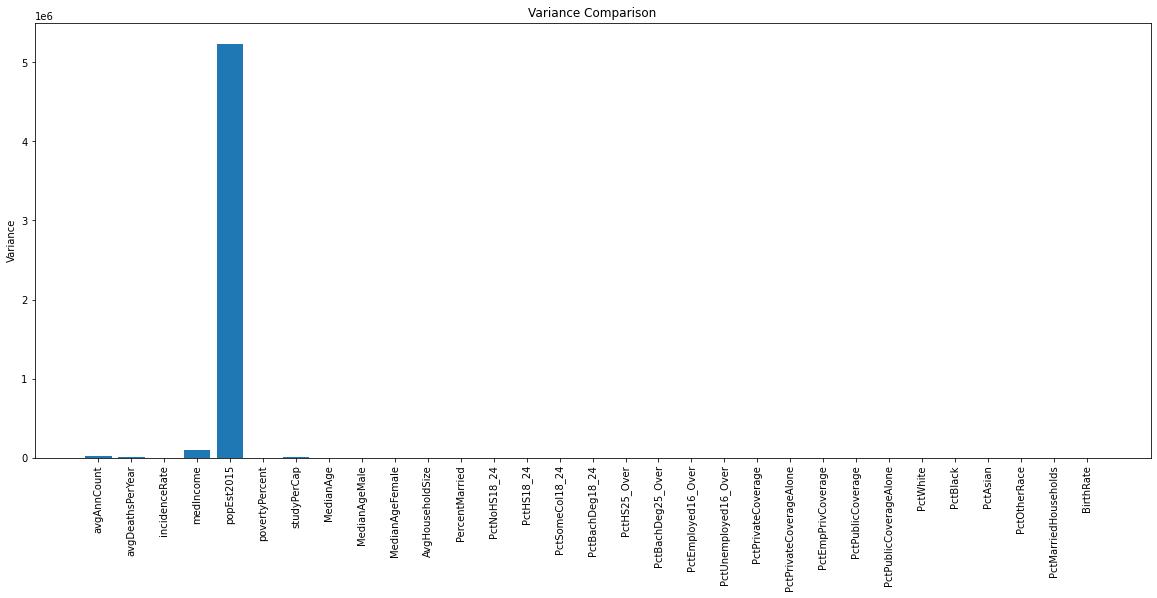

In [27]:
# Create a bar chart for visualizing the variances
import matplotlib.pyplot as plt
%matplotlib inline

plt.figure(figsize=(20,8))
plt.bar(x=input.columns, height=var.variances_)
plt.xticks(rotation='vertical')
plt.ylabel('Variance')
plt.title('Variance Comparison')

plt.show()

In [28]:
# This is least contributing due to mimimum variance so dropping AvgHouseholdSize

del input['AvgHouseholdSize']

In [37]:
del input['PctSomeCol18_24']
del input['PctEmployed16_Over']
del input['PctPrivateCoverageAlone']

In [29]:
# getting target only

target = cancer_data['TARGET_deathRate']

target.shape

(3051,)

In [38]:
input.dtypes

input.head(5)

avgAnnCount               float64
avgDeathsPerYear            int64
incidenceRate             float64
medIncome                   int64
popEst2015                  int64
povertyPercent            float64
studyPerCap               float64
MedianAge                 float64
MedianAgeMale             float64
MedianAgeFemale           float64
PercentMarried            float64
PctNoHS18_24              float64
PctHS18_24                float64
PctBachDeg18_24           float64
PctHS25_Over              float64
PctBachDeg25_Over         float64
PctUnemployed16_Over      float64
PctPrivateCoverage        float64
PctEmpPrivCoverage        float64
PctPublicCoverage         float64
PctPublicCoverageAlone    float64
PctWhite                  float64
PctBlack                  float64
PctAsian                  float64
PctOtherRace              float64
PctMarriedHouseholds      float64
BirthRate                 float64
dtype: object

,avgAnnCount,avgDeathsPerYear,incidenceRate,medIncome,popEst2015,povertyPercent,studyPerCap,MedianAge,MedianAgeMale,MedianAgeFemale,PercentMarried,PctNoHS18_24,PctHS18_24,PctBachDeg18_24,PctHS25_Over,PctBachDeg25_Over,PctUnemployed16_Over,PctPrivateCoverage,PctEmpPrivCoverage,PctPublicCoverage,PctPublicCoverageAlone,PctWhite,PctBlack,PctAsian,PctOtherRace,PctMarriedHouseholds,BirthRate
0,19.0,8,481.5,50038,2704,11.1,0.0,48.4,49.6,46.4,65.9,10.8,25.0,6.8,37.1,12.2,1.1,81.2,35.7,34.7,9.9,96.032049,0.724914,0.000000,0.000000,62.511457,15.157116
1,88.0,34,486.0,59399,14844,9.7,0.0,41.9,41.3,43.2,58.6,22.3,29.1,1.1,35.9,16.0,3.8,76.7,50.8,32.1,12.8,97.537344,0.719957,0.080743,0.040371,61.641045,3.293510
2,195.0,83,475.7,39721,25164,18.5,0.0,48.9,47.9,49.9,57.2,24.9,36.2,3.5,40.2,7.6,11.0,61.6,32.1,49.8,21.6,97.576566,0.360770,0.411749,0.082350,53.978102,6.390328
3,116.0,55,496.6,30299,17917,28.1,0.0,44.2,42.7,45.2,53.0,10.9,51.8,5.3,44.2,7.0,10.4,45.2,24.2,53.2,33.0,97.908650,0.161731,0.306731,0.340193,51.013143,5.124836
4,80.0,35,372.0,39625,14058,17.4,0.0,45.0,42.2,48.0,52.2,12.6,31.2,0.2,28.3,10.5,9.2,56.6,33.4,43.0,24.7,82.672551,1.834103,0.682617,8.253465,50.566426,3.897033


In [41]:
target.dtypes

dtype('float64')

In [42]:

from sklearn.linear_model import LinearRegression

# create the model object
lr = LinearRegression()

# fit the model on train data
lr.fit(input, target)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [47]:
input.shape

(3051, 27)

In [46]:

del test_data['PctSomeCol18_24']
del test_data['PctEmployed16_Over']
del test_data['PctPrivateCoverageAlone']
del test_data['AvgHouseholdSize']
 # Removing non-floating values
del test_data['Geography']
del test_data['binnedInc']

test_data.shape

(762, 27)

In [49]:
#Predictions on the Test data
predictions_lr = lr.predict(test_data)

#Putting the above predictions and probabilities together to create a readable df
lr_df = pd.DataFrame(predictions_lr.reshape(len(predictions_lr),1))
lr_df.rename(columns={0:'prediction'}, inplace=True)
lr_df.head(5)

,prediction
0,162.545533
1,194.783486
2,155.910328
3,152.715270
4,156.977817


In [51]:
import numpy
numpy.savetxt("cancer.csv", lr_df, delimiter=",")